In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("./data/cleaned_reddit_posts.csv")
data.head(10)

,created_utc,cleaned_title,cleaned_comments,cleaned_url_content
0,2020-01-01 00:00:08,thousands of indians ushered in the new year b...,...because most indians are not muslims. the m...,new delhi thousands of indians ushered in the ...
1,2020-01-01 00:21:23,a scary unidentified virus is spreading in china,...ah a fellow time traveler....well good is t...,dozens of residents of wuhan the capital city ...
2,2020-01-01 00:31:16,kim jong un warns hostile us policy means ther...,this guy...trump will comfort kim....being tha...,washington cnn north korean leader kim jong un...
3,2020-01-01 00:53:25,north korean leader to end missile test ban cl...,...that a choice of course. we can agree that ...,kim jongun has signalled that north korea will...
4,2020-01-01 00:53:55,snapchat has stopped working for users around ...,oh the humanity ...omg....what will teenagers ...,for free real time breaking news alerts sent s...
5,2020-01-01 00:57:53,tiktok claims zero takedown requests from chin...,commieai removes them. no requests needed...oh...,tiktok released its first transparency report ...
6,2020-01-01 01:03:39,trump tries to avoid his own benghazi. defense...,true....you right i forgot about fast. seems l...,the unit which goes by the unwieldy name speci...
7,2020-01-01 01:11:25,airborne division preparing for deployment am...,so what your point mine is that these nuisance...,fort bragg airborne division preparing for dep...
8,2020-01-01 01:14:52,soldiers with airborne headed for centcom add...,i don make the decisions. the dnc does......no...,following violent protests at the u.s. embassy...
9,2020-01-01 01:39:48,australia bushfire smoke spreads to nz as canb...,fahrenheit would becelsius which would be fin...,not available


In [6]:
data.count()

created_utc            99300
cleaned_title          99300
cleaned_comments       99019
cleaned_url_content    99298
dtype: int64

## Text Analysis

### Plotting 'title' character length

<AxesSubplot: >

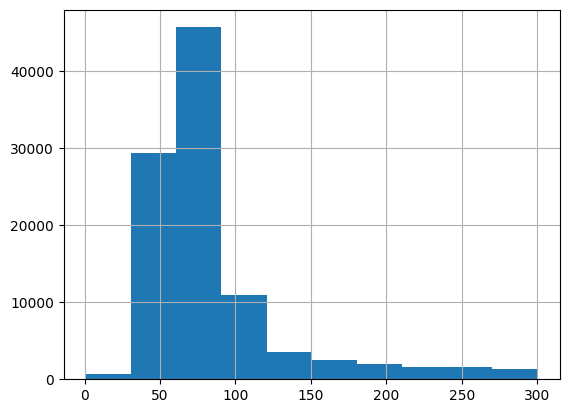

In [8]:
data['cleaned_title'].str.len().hist()

### Plotting 'title' word count

<AxesSubplot: >

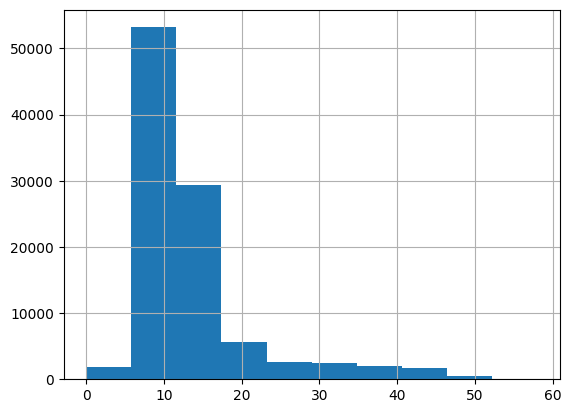

In [9]:
data['cleaned_title'].str.split().map(lambda x: len(x)).hist()

### Plotting average word length in 'title'

/Users/anshitverma/Desktop/Topic_Modeling/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/anshitverma/Desktop/Topic_Modeling/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


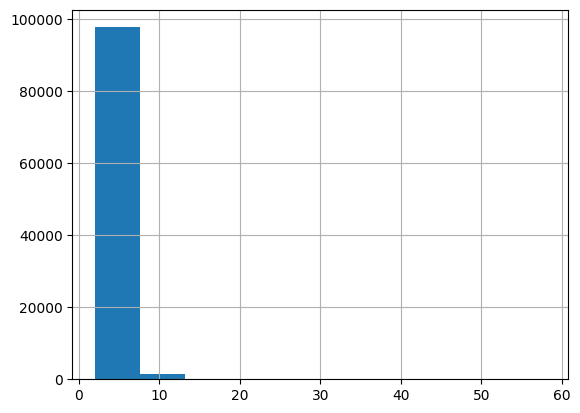

In [10]:
average_word_length = data['cleaned_title'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

#### We can see that there is one outlier while observing average character length, average word count and average word length. Let us find more about the outlier.

In [11]:
data['cleaned_title'].str.split().map(lambda x: len(x)).describe()

count    99300.000000
mean        13.342075
std          7.820122
min          0.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         58.000000
Name: cleaned_title, dtype: float64

In [12]:
data['cleaned_title'].str.split().map(lambda x: len(x)).idxmax()

4207

In [13]:
data['cleaned_title'][4207]

' have not seen anything yet climate activist greta says ahead of davosto the world leaders and those in power i would like to say that you have not seen anything yet. you have not seen the last of us we can assure you that. and that is the message that we will bring to the wef in davos.'

## Analysing stop words

In [14]:
import nltk
from nltk.corpus import stopwords

In [15]:
stop = set(stopwords.words('english'))

In [16]:
corpus = []
new = data['cleaned_title'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [17]:
from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

<BarContainer object of 10 artists>

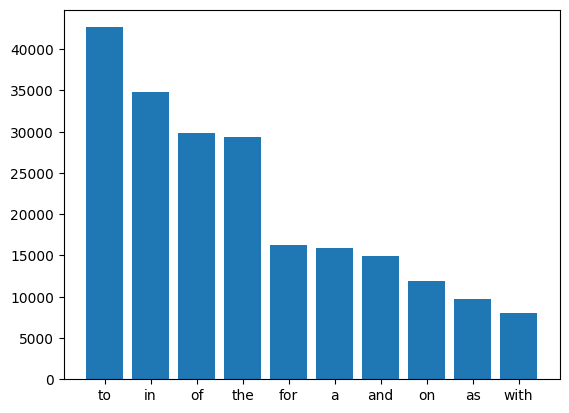

In [18]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

### Analysing words that are not stopwords

In [19]:
from collections import Counter
counter = Counter(corpus)
most = counter.most_common()

<AxesSubplot: >

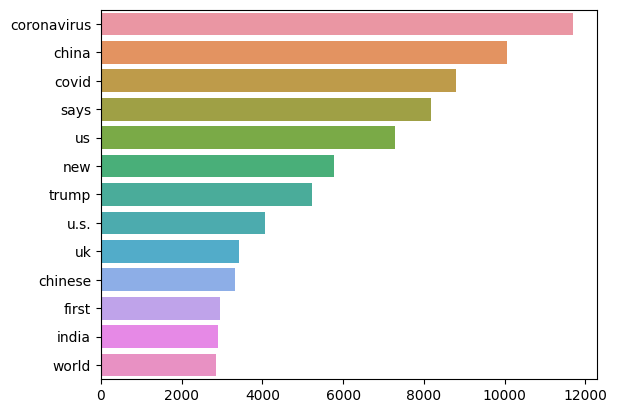

In [20]:
x,y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)

## Analysing N-grams in the 'title'

In [21]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

#### Analysing bi-grams

<AxesSubplot: >

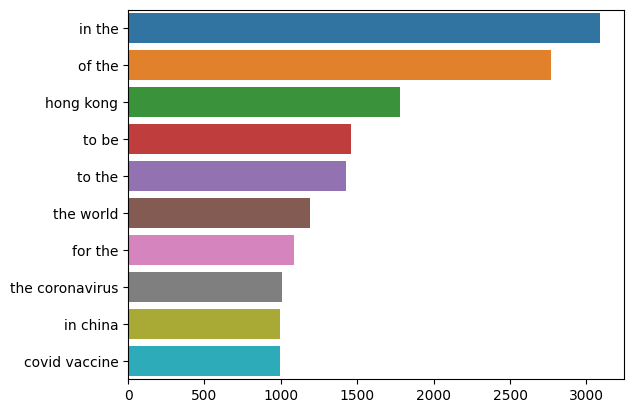

In [23]:
top_n_bigrams = get_top_ngrams(data['cleaned_title'], 2)[:10]
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)

#### Analysing tri-grams

<AxesSubplot: >

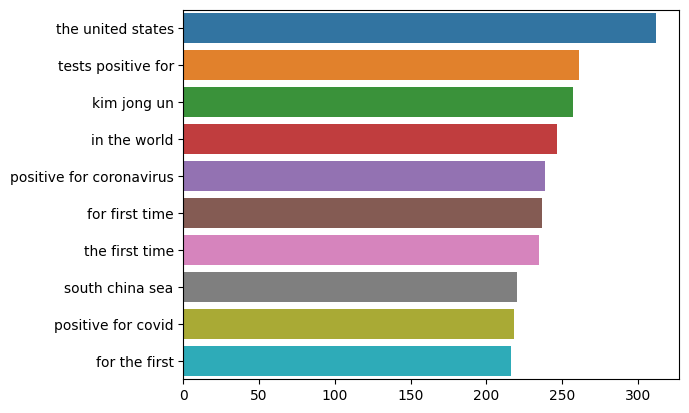

In [24]:
top_tri_grams=get_top_ngrams(data['cleaned_title'], n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

### Analysing number of posts monthwise

In [25]:
data.groupby(pd.PeriodIndex(data['created_utc'], freq="M"))['created_utc'].count()

created_utc
2020-01    6915
2020-02    5193
2020-03    7632
2020-04    6995
2020-05    5324
2020-06    5376
2020-07    5706
2020-08    4675
2020-09    3961
2020-10    4251
2020-11    4576
2020-12    4884
2021-01    4545
2021-02    3789
2021-03    2625
2021-04    4458
2021-05    5895
2021-06    5026
2021-07    4695
2021-08    2779
Freq: M, Name: created_utc, dtype: int64